In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]]).astype(np.float32)
# y_train = np.array([460, 232, 178]).astype(np.float32)

data = np.loadtxt("/content/drive/My Drive/Colab Notebooks/housedata.txt", delimiter=',', skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]

In [ ]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (99, 4), X Type:<class 'numpy.ndarray'>)
[[1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01]
 [7.88e+02 2.00e+00 1.00e+00 8.00e+01]
 [1.20e+03 2.00e+00 2.00e+00 1.70e+01]
 [1.56e+03 2.00e+00 1.00e+00 1.80e+01]
 [1.43e+03 3.00e+00 1.00e+00 2.00e+01]
 [1.22e+03 2.00e+00 1.00e+00 1.50e+01]
 [1.09e+03 2.00e+00 1.00e+00 6.40e+01]
 [8.48e+02 1.00e+00 1.00e+00 1.70e+01]
 [1.68e+03 3.00e+00 2.00e+00 2.30e+01]
 [1.77e+03 3.00e+00 2.00e+00 1.80e+01]
 [1.04e+03 3.00e+00 1.00e+00 4.40e+01]
 [1.65e+03 2.00e+00 1.00e+00 2.10e+01]
 [1.09e+03 2.00e+00 1.00e+00 3.50e+01]
 [1.32e+03 3.00e+00 1.00e+00 1.40e+01]
 [1.59e+03 0.00e+00 1.00e+00 2.00e+01]
 [9.72e+02 2.00e+00 1.00e+00 7.30e+01]
 [1.10e+03 3.0

In [ ]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [ ]:
def compute_cost(X, y, w, b,l):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2
    tcost=0
    for i in range(X.shape[1]):
      tcost+=w[i]**2
    tcost*=l
    cost+=tcost
          #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [ ]:
def predict(x,w,b):
  return np.dot(x,w)+b

In [ ]:
def compute_gradient(X,y,w,b,l):
  j_wb=np.zeros(w.shape[0])
  j_b=0
  for i in range(X.shape[0]):
    j_wb_i=np.zeros(w.shape[0])
    b_i=(predict(X[i],w,b)-y[i])
    for j in range(w.shape[0]):

      j_wb_i[j]=(predict(X[i],w,b)-y[i])*X[i][j]+l*w[j]
    j_wb+=j_wb_i
    j_b+=b_i
  j_wb/=X.shape[0]
  j_b/=X.shape[0]
  # for k in range()
  # for j in range(X.shape[0]):
  return j_wb,j_b

In [ ]:
def gradient_descent(X,y,w,b,a,l,num_iters):
  for i in range(num_iters):
    j_wb,j_b=compute_gradient(X,y,w,b,l)
    w-=a*j_wb
    b-=a*j_b
    if i%30==0:
      print(compute_cost(X,y,w,b,l))
  return w,b


In [ ]:
w_init=np.zeros(X_train[0].shape)
b_init=0
X_init=deepcopy(X_train)
#Scaling
# for i in range(w.shape[0]):
#   X_init[:,i]=X_init[:,i]/np.amax(X_init[:,i])

#Mean Normalization
# for i in range(w.shape[0]):
#   X_init[:,i]=(X_init[:,i]-np.mean(X_init[:,i]))/(np.amax(X_init[:,i])-np.amin(X_init[:,i]))

#Z-score Normalization
for i in range(w_init.shape[0]):
  X_init[:,i]=(X_init[:,i]-np.mean(X_init[:,i]))/(np.std(X_init[:,i]))
print(X_init)
y_init=deepcopy(y_train)

NameError: ignored

In [ ]:
w,b=gradient_descent(X_init,y_init,w_init,b_init,0.1,0.1,900)
# for i in range(w.shape[0]):
#   w[i]/=np.amax(X_train[:,i])
print(w,b)
print(predict(X_train[2],w,b))

54965.405283522596
574.0283038490079
365.79121979928215
342.32272174751967
336.6096910708481
335.1338682879884
334.7469825352946
334.6451491095341
334.618314642555
334.61124105726424
334.6093762666499
334.6088846408265
334.6087550291459
334.6087208583288
334.6087118495226
334.6087094744364
334.6087088482668
334.60870868318307
334.60870863966056
334.60870862818604
334.6087086251606
334.60870862436326
334.608708624153
334.6087086240978
334.60870862408314
334.60870862407944
334.60870862407916
334.60870862407916
334.60870862407916
334.60870862407916
[ 90.44 -13.   -21.43 -36.98] 363.15608080808056
154745.0826586144


In [ ]:
m = X_train.shape[0]
f_wb = np.zeros(m)
f=0
for i in range(m):
  f_wb[i] = w[f] * X_init[i][f] + b

In [ ]:
print(X_init[:,0].shape, f_wb.shape)
X_init

(99,) (99,)


array([[-4.24e-01,  4.34e-01, -7.89e-01,  9.94e-01],
       [ 1.28e+00,  4.34e-01,  1.27e+00, -8.30e-01],
       [ 7.45e-01,  4.34e-01,  1.27e+00,  1.40e-01],
       [ 1.31e+00,  4.34e-01,  1.27e+00, -9.07e-01],
       [-2.54e-01, -1.10e+00, -7.89e-01, -9.46e-01],
       [-1.35e+00, -1.10e+00, -7.89e-01,  1.07e+00],
       [ 1.01e+00,  4.34e-01, -7.89e-01, -8.30e-01],
       [-9.53e-01,  4.34e-01, -7.89e-01,  1.79e-01],
       [ 4.31e+00,  1.97e+00,  1.27e+00,  1.89e+00],
       [-1.53e+00, -1.10e+00, -7.89e-01,  1.61e+00],
       [-5.31e-01, -1.10e+00,  1.27e+00, -8.30e-01],
       [ 3.37e-01, -1.10e+00, -7.89e-01, -7.91e-01],
       [ 2.82e-02,  4.34e-01, -7.89e-01, -7.13e-01],
       [-4.82e-01, -1.10e+00, -7.89e-01, -9.07e-01],
       [-7.93e-01, -1.10e+00, -7.89e-01,  9.94e-01],
       [-1.39e+00, -2.63e+00, -7.89e-01, -8.30e-01],
       [ 6.40e-01,  4.34e-01,  1.27e+00, -5.97e-01],
       [ 8.49e-01,  4.34e-01,  1.27e+00, -7.91e-01],
       [-9.19e-01,  4.34e-01, -7.89e-01,  2.18

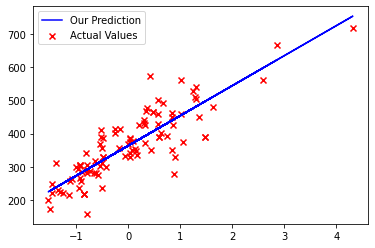

In [ ]:

plt.plot(X_init[:,f], f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(X_init[:,f], y_train, marker='x', c='r',label='Actual Values')


plt.legend()
plt.show()

In [ ]:
##Your House Here
X_predict=[5849,5,2,37]


for i in range(w.shape[0]):
  X_predict[i]=(X_predict[i]-np.mean(X_train[:,i]))/(np.std(X_train[:,i]))
print(X_predict)

print(predict(X_predict,w,b))

[10.763989390238649, 3.501457072742883, 1.266989801811655, -0.05368317126654802]
1439.359704266293
